In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time

import datetime
plt.rcParams["figure.figsize"] = [16,9]
#plt.rcParams['axes.facecolor'] = 'dimgrey'


In [2]:
def DataFilter(df1):
    df = df1.copy(deep=True)
    df['Vic'] = np.NAN
    df['GF'] = np.NAN
    df['GA'] = np.NAN
    df['GD'] = np.NAN
    df['ExpGf'] = np.NAN
    df['ExpGa'] = np.NAN
    df['ExpGd'] = np.NAN
    df['ExpPPM'] = np.NAN
    df['ExpRate'] = np.NAN
    for i in xrange(len(df)):
        tmp = df.score[i]
        if tmp[2] == ":":
            print tmp
            tmp = "4:2"
        #chapter_2.GF[i] = int(tmp[0])
        df.loc[i, 'GF'] = int(tmp[0])
        df.loc[i, 'GA'] = int(tmp[2])
        df.loc[i, 'GD'] = int(tmp[0]) - int(tmp[2])
        df.loc[i, 'Vic'] = float((tmp[0] > tmp[2]))

    return df

In [3]:
def load_data(df_list, i):
    print "start",
    country = ['Premier League', 'Primera', 'Bundesliga','Serie A']
    df = pd.concat(df_list, ignore_index=True)
    df.date = pd.to_datetime(df.date, dayfirst=True)
    df = df.sort_values(by='date')
    mask = df.match_type.str.startswith(country[i], na=False)
    df = df.loc[mask]
    df = df.reset_index(drop=True)
    df = DataFilter(df)
    print "end"
    return df

In [4]:
start_1 = pd.to_datetime('5/1/1996') #Wenger In
start_2 = pd.to_datetime('6/1/2003') #阿布
start_3 = pd.to_datetime('7/1/2004') #Big4 starts
start_4 = pd.to_datetime('9/1/2008') #Abu Dhabi
end_1 = pd.to_datetime('5/1/2009') # Big4 ends
end_2 = pd.to_datetime('12/17/2015')

teams1 = ["manchester-united", "liverpool-fc", "arsenal-fc", "chelsea-fc", 
         "manchester-city", "tottenham-hotspur", "everton-fc"]
teams2 = ["real-madrid", "fc-barcelona", "deportivo-la-coruna", 
         "atletico-madrid", "valencia-cf", "villarreal-cf", "sevilla-fc", "athletic-bilbao"]
teams3 = ["bayern-muenchen", "borussia-dortmund", "vfb-stuttgart", "vfl-wolfsburg",
        "werder-bremen", "bayer-leverkusen", "fc-schalke-04", "hamburger-sv"]
teams4 = ["juventus", "ssc-napoli", "as-roma", "lazio-roma", "inter", "ac-milan",
        "acf-fiorentina", "parma-calcio-1913"]

In [5]:
dfs1 =[[], [], [], [], [], []]
pre = './data/'
for i in range(6):
    for j in range(10):
        add = pre+teams1[i]+'/'+teams1[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs1[i].append(df_cache)

teams_data1 = [load_data(dfs1[i], 0) for i in range(6)]
print len(teams_data1[0]), len(teams_data1[1]), len(teams_data1[5])

dfs2 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams2[i]+'/'+teams2[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs2[i].append(df_cache)

teams_data2 = [load_data(dfs2[i], 1) for i in range(8)]
print len(teams_data2[0]), len(teams_data2[1]), len(teams_data2[6])

dfs3 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams3[i]+'/'+teams3[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs3[i].append(df_cache)

teams_data3 = [load_data(dfs3[i], 2) for i in range(8)]
print len(teams_data3[0]), len(teams_data3[1]), len(teams_data3[6])

dfs4 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams4[i]+'/'+teams4[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs4[i].append(df_cache)

teams_data4 = [load_data(dfs4[i], 3) for i in range(8)]
print len(teams_data4[0]), len(teams_data4[1]), len(teams_data4[6])

start end
start end
start end
start end
start end
start end
380 380 380
start 10:2 (4:2)
end
start end
start end
start end
start end
start end
start end
start end
378 378 379
start end
start end
start end
start end
start end
start end
start end
start end
340 340 340
start end
start end
start end
start end
start end
start end
start end
start end
378 378 378


In [6]:
metrics1 = [[], [], [], [], [], [], []]
metrics2 = [[], [], [], [], [], [], [], []]
metrics3 = [[], [], [], [], [], [], [], []]
metrics4 = [[], [], [], [], [], [], [], []]


for i in range(6):
    metrics1[i].append(teams_data1[i].points.cumsum())
    metrics1[i].append(teams_data1[i].GF.cumsum())
    metrics1[i].append(teams_data1[i].GA.cumsum())
for i in range(8):
    metrics2[i].append(teams_data2[i].points.cumsum())
    metrics2[i].append(teams_data2[i].GF.cumsum())
    metrics2[i].append(teams_data2[i].GA.cumsum())
for i in range(8):
    metrics3[i].append(teams_data3[i].points.cumsum())
    metrics3[i].append(teams_data3[i].GF.cumsum())
    metrics3[i].append(teams_data3[i].GA.cumsum())
for i in range(8):
    metrics4[i].append(teams_data4[i].points.cumsum())
    metrics4[i].append(teams_data4[i].GF.cumsum())
    metrics4[i].append(teams_data4[i].GA.cumsum())
            

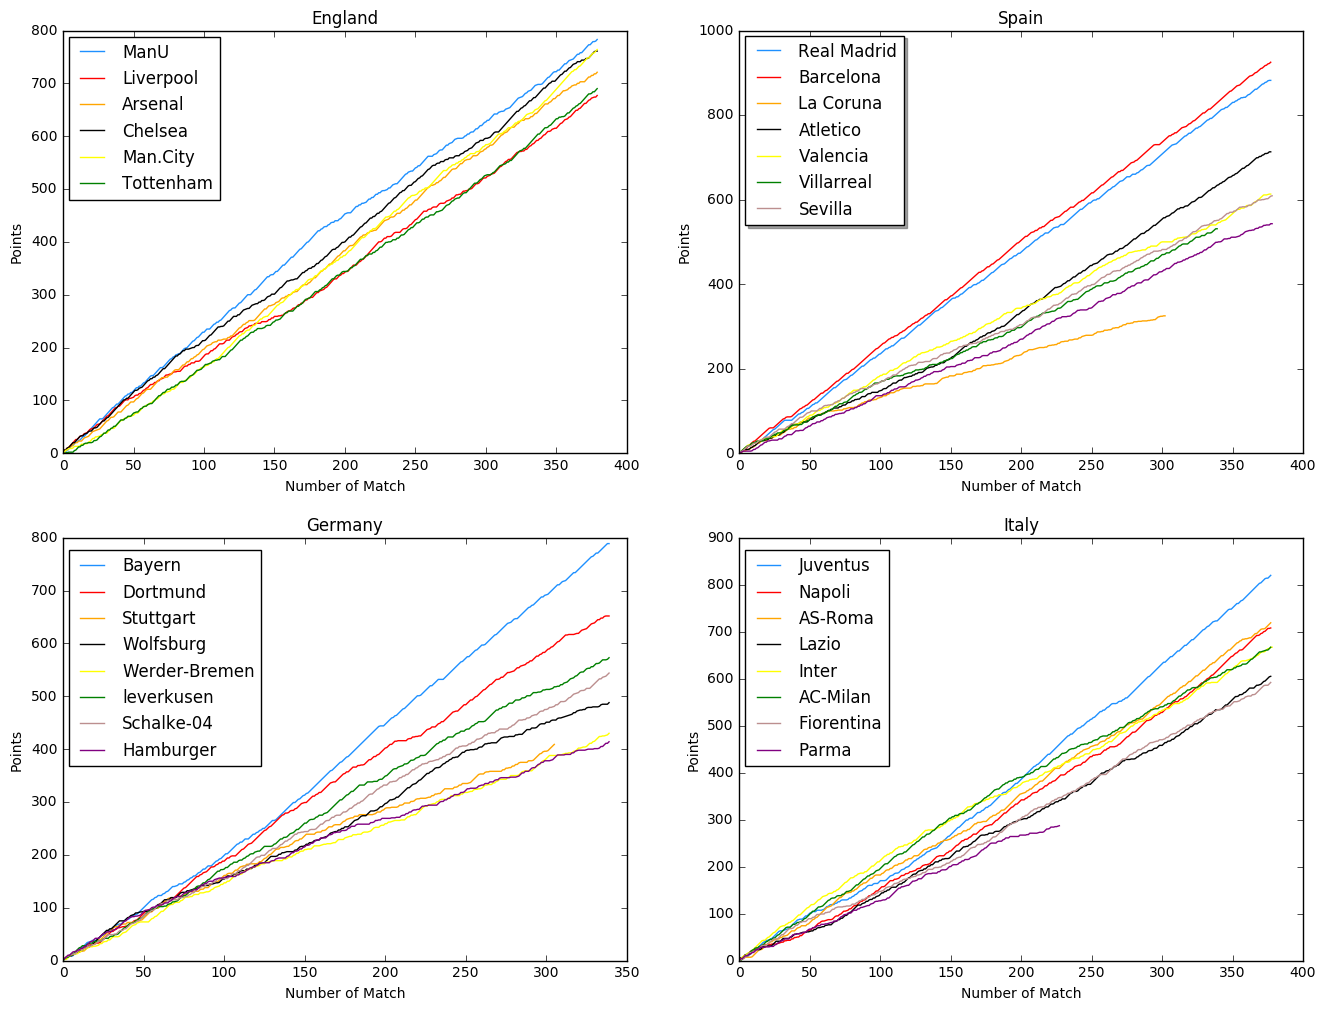

In [7]:
plt.rcParams["figure.figsize"] = [16,12]

colors = ['dodgerblue', 'red', 'orange', 'k', 'yellow', 'green', 'rosybrown', 'purple']

plt.title('Total Points (1998-2008)', dict(size=14))

plt.subplot(221)

for i in range(6):
    plt.plot(teams_data1[i].index, metrics1[i][0], color=colors[i])

#plt.xlim([0,380])
plt.title('England', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('ManU', 'Liverpool', 'Arsenal', 'Chelsea', 
            'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.60))

plt.subplot(222)

for i in range(8):
    plt.plot(teams_data2[i].index, metrics2[i][0], color=colors[i])

#plt.xlim([0,380])
plt.title('Spain', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
#plt.ylim([0, 960])
plt.legend(('Real Madrid', 'Barcelona', 'La Coruna', 
            'Atletico', 'Valencia', 'Villarreal', 'Sevilla'), shadow=True, loc=(0.01, 0.54))

plt.subplot(223)

for i in range(8):
    plt.plot(teams_data3[i].index, metrics3[i][0], color=colors[i])

#plt.xlim([0,820])
plt.title('Germany', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')

plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.46))


plt.subplot(224)

for i in range(8):
    plt.plot(teams_data4[i].index, metrics4[i][0], color=colors[i])

#plt.xlim([0,380])
#plt.ylim([0, 860])

plt.title('Italy', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Juventus', 'Napoli', 'AS-Roma', 'Lazio', 
            'Inter', 'AC-Milan', 'Fiorentina', 'Parma'), shadow=False, loc=(0.01, 0.46))
plt.show()

In [8]:
dfs1 =[[], [], [], [], [], []]
pre = './data/'
for i in range(6):
    for j in range(20):
        add = pre+teams1[i]+'/'+teams1[i]+'_'+str(1998+j)+'_'+str(1999+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs1[i].append(df_cache)

teams_data1 = [load_data(dfs1[i], 0) for i in range(6)]
print len(teams_data1[0]), len(teams_data1[1]), len(teams_data1[5])

dfs2 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(20):
        add = pre+teams2[i]+'/'+teams2[i]+'_'+str(1998+j)+'_'+str(1999+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs2[i].append(df_cache)

teams_data2 = [load_data(dfs2[i], 1) for i in range(8)]
print len(teams_data2[0]), len(teams_data2[1]), len(teams_data2[6])

dfs3 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(20):
        add = pre+teams3[i]+'/'+teams3[i]+'_'+str(1998+j)+'_'+str(1999+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs3[i].append(df_cache)

teams_data3 = [load_data(dfs3[i], 2) for i in range(8)]
print len(teams_data3[0]), len(teams_data3[1]), len(teams_data3[6])

dfs4 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(20):
        add = pre+teams4[i]+'/'+teams4[i]+'_'+str(1998+j)+'_'+str(1999+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs4[i].append(df_cache)

teams_data4 = [load_data(dfs4[i], 3) for i in range(8)]
print len(teams_data4[0]), len(teams_data4[1]), len(teams_data4[6])

start end
start end
start end
start end
start end
start end
760 760 760
start 10:2 (4:2)
end
start end
start end
start end
start end
start end
start end
start end
758 758 683
start end
start end
start end
start end
start end
start end
start end
start end
680 680 680
start end
start end
start end
start end
start end
start end
start end
start end
698 450 666


In [9]:
metrics1 = [[], [], [], [], [], [], []]
metrics2 = [[], [], [], [], [], [], [], []]
metrics3 = [[], [], [], [], [], [], [], []]
metrics4 = [[], [], [], [], [], [], [], []]


for i in range(6):
    metrics1[i].append(teams_data1[i].points.cumsum())
    metrics1[i].append(teams_data1[i].GF.cumsum())
    metrics1[i].append(teams_data1[i].GA.cumsum())
for i in range(8):
    metrics2[i].append(teams_data2[i].points.cumsum())
    metrics2[i].append(teams_data2[i].GF.cumsum())
    metrics2[i].append(teams_data2[i].GA.cumsum())
for i in range(8):
    metrics3[i].append(teams_data3[i].points.cumsum())
    metrics3[i].append(teams_data3[i].GF.cumsum())
    metrics3[i].append(teams_data3[i].GA.cumsum())
for i in range(8):
    metrics4[i].append(teams_data4[i].points.cumsum())
    metrics4[i].append(teams_data4[i].GF.cumsum())
    metrics4[i].append(teams_data4[i].GA.cumsum())
            

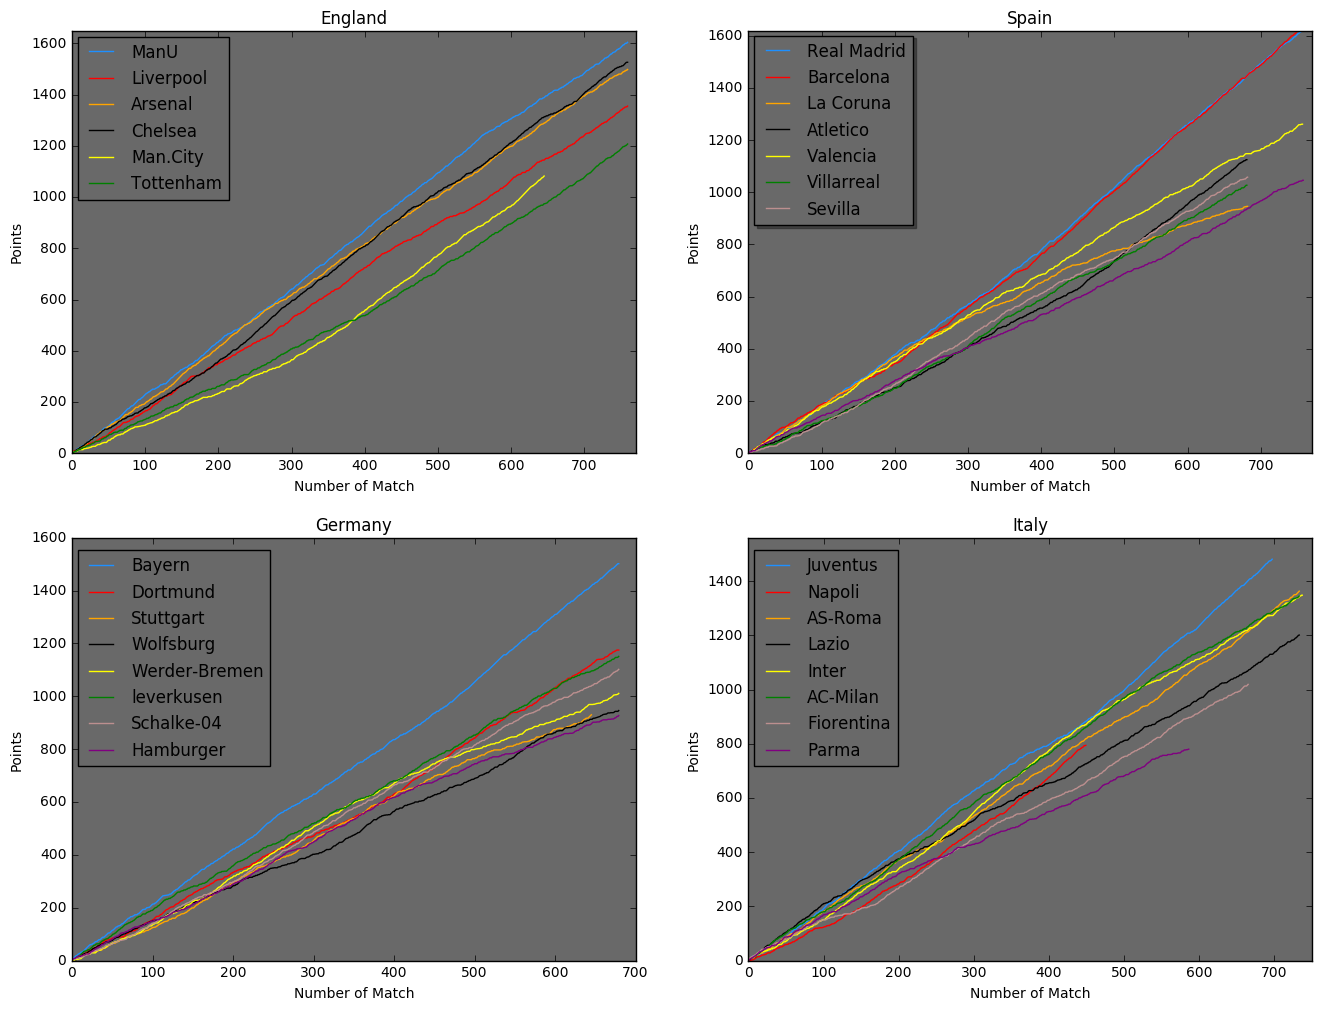

In [11]:
plt.rcParams["figure.figsize"] = [16,12]

colors = ['dodgerblue', 'red', 'orange', 'k', 'yellow', 'green', 'rosybrown', 'purple']

plt.title('Total Points (1998-2008)', dict(size=14))

plt.subplot(221)

for i in range(6):
    plt.plot(teams_data1[i].index, metrics1[i][0], color=colors[i])

plt.xlim([0,770])
plt.ylim([0, 1650])
plt.title('England', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('ManU', 'Liverpool', 'Arsenal', 'Chelsea', 
            'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.60))

plt.subplot(222)

for i in range(8):
    plt.plot(teams_data2[i].index, metrics2[i][0], color=colors[i])

plt.title('Spain', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.xlim([0,770])
plt.ylim([0, 1620])
plt.legend(('Real Madrid', 'Barcelona', 'La Coruna', 
            'Atletico', 'Valencia', 'Villarreal', 'Sevilla'), shadow=True, loc=(0.01, 0.54))

plt.subplot(223)

for i in range(8):
    plt.plot(teams_data3[i].index, metrics3[i][0], color=colors[i])

#plt.xlim([0,820])
plt.title('Germany', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')

plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.46))


plt.subplot(224)

for i in range(8):
    plt.plot(teams_data4[i].index, metrics4[i][0], color=colors[i])

plt.xlim([0,750])
plt.ylim([0, 1560])

plt.title('Italy', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Points')
plt.legend(('Juventus', 'Napoli', 'AS-Roma', 'Lazio', 
            'Inter', 'AC-Milan', 'Fiorentina', 'Parma'), shadow=False, loc=(0.01, 0.46))
plt.show()

In [12]:
dfs1 =[[], [], [], [], [], []]
pre = './data/'
for i in range(6):
    for j in range(10):
        add = pre+teams1[i]+'/'+teams1[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs1[i].append(df_cache)

teams_data1 = [load_data(dfs1[i], 0) for i in range(6)]
print len(teams_data1[0]), len(teams_data1[1]), len(teams_data1[5])

dfs2 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams2[i]+'/'+teams2[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs2[i].append(df_cache)

teams_data2 = [load_data(dfs2[i], 1) for i in range(8)]
print len(teams_data2[0]), len(teams_data2[1]), len(teams_data2[6])

dfs3 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams3[i]+'/'+teams3[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs3[i].append(df_cache)

teams_data3 = [load_data(dfs3[i], 2) for i in range(8)]
print len(teams_data3[0]), len(teams_data3[1]), len(teams_data3[6])

dfs4 =[[], [], [], [], [], [], [], []]
pre = './data/'
for i in range(8):
    for j in range(10):
        add = pre+teams4[i]+'/'+teams4[i]+'_'+str(2008+j)+'_'+str(2009+j)+'.csv'
        df_cache = pd.read_csv(add, index_col=0, dtype={'points': float})
        dfs4[i].append(df_cache)

teams_data4 = [load_data(dfs4[i], 3) for i in range(8)]
print len(teams_data4[0]), len(teams_data4[1]), len(teams_data4[6])

start end
start end
start end
start end
start end
start end
380 380 380
start 10:2 (4:2)
end
start end
start end
start end
start end
start end
start end
start end
378 378 379
start end
start end
start end
start end
start end
start end
start end
start end
340 340 340
start end
start end
start end
start end
start end
start end
start end
start end
378 378 378


In [13]:
metrics1 = [[], [], [], [], [], [], []]
metrics2 = [[], [], [], [], [], [], [], []]
metrics3 = [[], [], [], [], [], [], [], []]
metrics4 = [[], [], [], [], [], [], [], []]


for i in range(6):
    metrics1[i].append(teams_data1[i].points.cumsum())
    metrics1[i].append(teams_data1[i].GF.cumsum())
    metrics1[i].append(teams_data1[i].GA.cumsum())
for i in range(8):
    metrics2[i].append(teams_data2[i].points.cumsum())
    metrics2[i].append(teams_data2[i].GF.cumsum())
    metrics2[i].append(teams_data2[i].GA.cumsum())
for i in range(8):
    metrics3[i].append(teams_data3[i].points.cumsum())
    metrics3[i].append(teams_data3[i].GF.cumsum())
    metrics3[i].append(teams_data3[i].GA.cumsum())
for i in range(8):
    metrics4[i].append(teams_data4[i].points.cumsum())
    metrics4[i].append(teams_data4[i].GF.cumsum())
    metrics4[i].append(teams_data4[i].GA.cumsum())
            

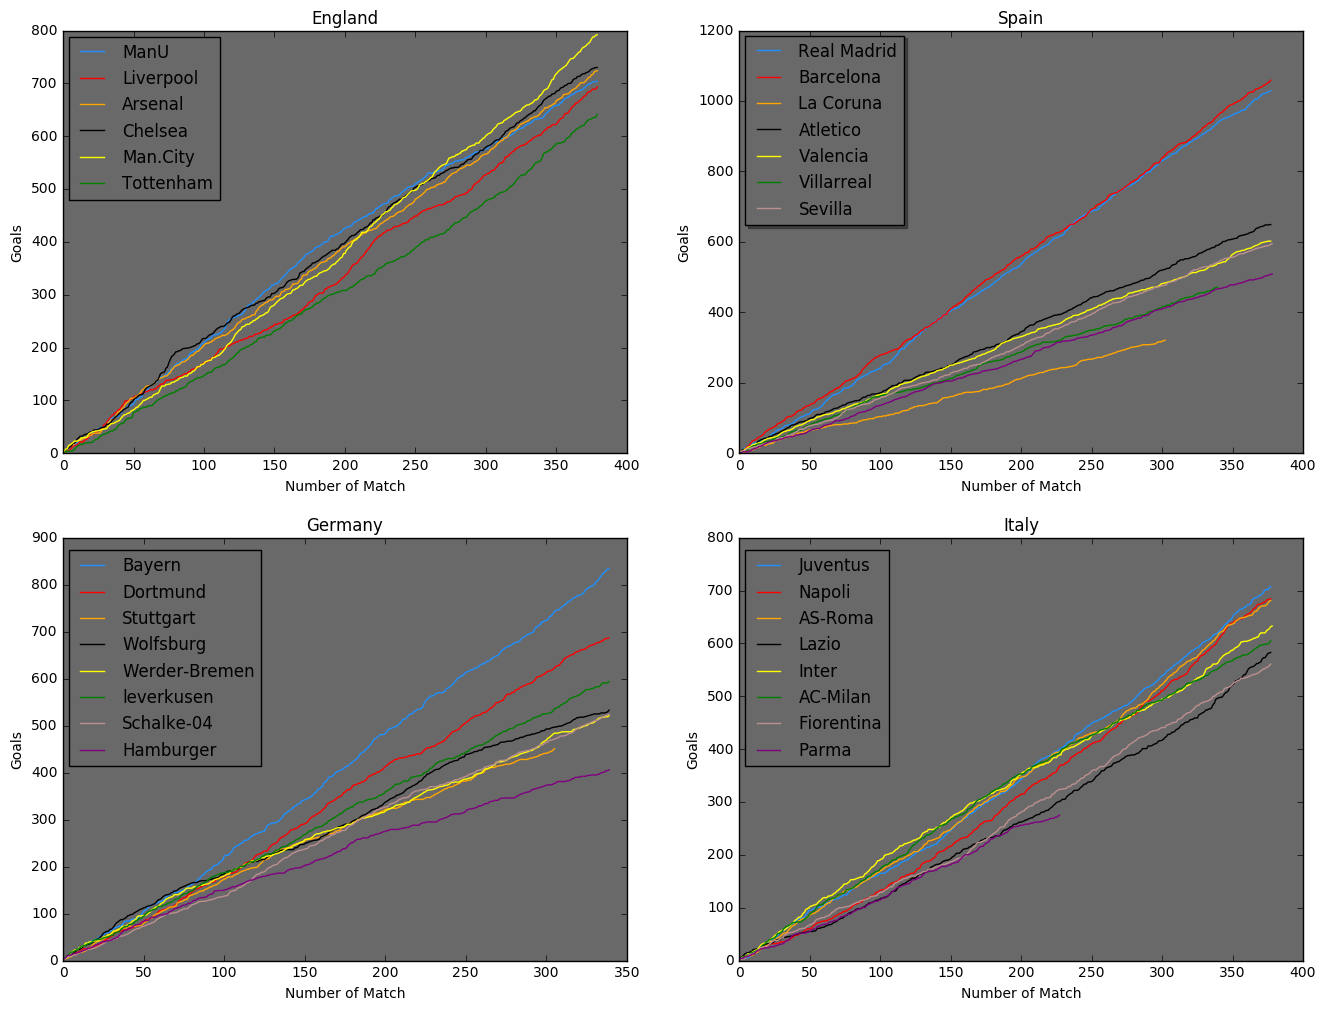

In [15]:
plt.rcParams["figure.figsize"] = [16,12]

colors = ['dodgerblue', 'red', 'orange', 'k', 'yellow', 'green', 'rosybrown', 'purple']

plt.title('Total Points (1998-2008)', dict(size=14))

plt.subplot(221)

for i in range(6):
    plt.plot(teams_data1[i].index, metrics1[i][1], color=colors[i])

#plt.xlim([0,380])
#plt.ylim([0, 960])
plt.title('England', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('ManU', 'Liverpool', 'Arsenal', 'Chelsea', 
            'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.60))

plt.subplot(222)

for i in range(8):
    plt.plot(teams_data2[i].index, metrics2[i][1], color=colors[i])

#plt.xlim([0,380])
#plt.ylim([0, 1100])
plt.title('Spain', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Real Madrid', 'Barcelona', 'La Coruna', 
            'Atletico', 'Valencia', 'Villarreal', 'Sevilla'), shadow=True, loc=(0.01, 0.54))

plt.subplot(223)

for i in range(8):
    plt.plot(teams_data3[i].index, metrics3[i][1], color=colors[i])

# plt.xlim([0,380])
# plt.ylim([0, 860])
plt.title('Germany', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')

plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.46))


plt.subplot(224)

for i in range(8):
    plt.plot(teams_data4[i].index, metrics4[i][1], color=colors[i])

#plt.xlim([0,380])
#plt.ylim([0, 750])

plt.title('Italy', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Juventus', 'Napoli', 'AS-Roma', 'Lazio', 
            'Inter', 'AC-Milan', 'Fiorentina', 'Parma'), shadow=False, loc=(0.01, 0.46))
plt.show()

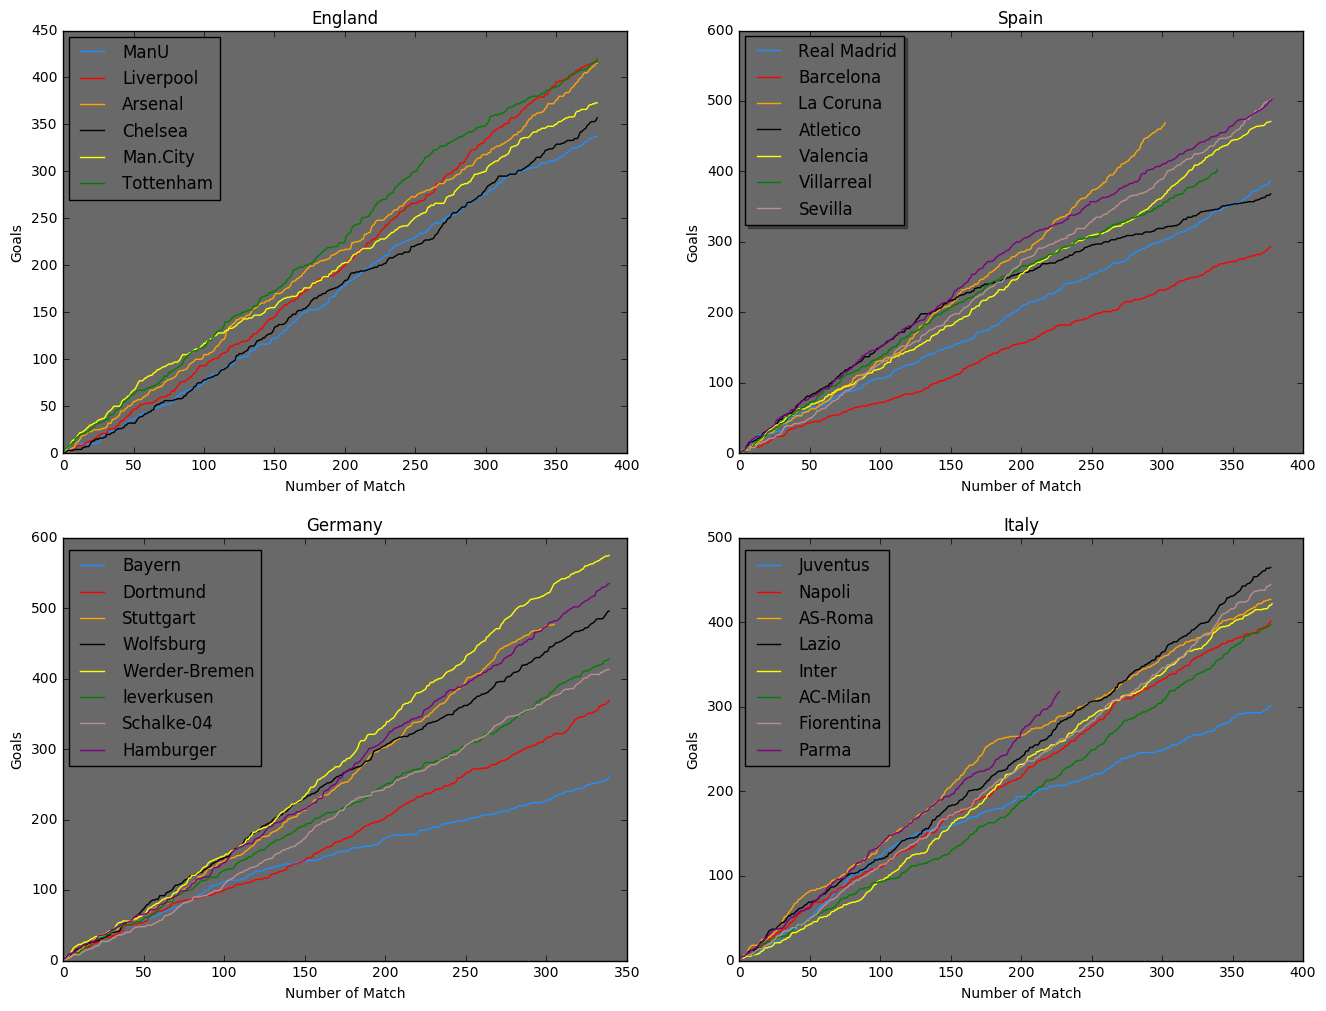

In [18]:
plt.rcParams["figure.figsize"] = [16,12]

colors = ['dodgerblue', 'red', 'orange', 'k', 'yellow', 'green', 'rosybrown', 'purple']

plt.title('Total Points (1998-2008)', dict(size=14))

plt.subplot(221)

for i in range(6):
    plt.plot(teams_data1[i].index, metrics1[i][2], color=colors[i])

#plt.xlim([0,380])
plt.title('England', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('ManU', 'Liverpool', 'Arsenal', 'Chelsea', 
            'Man.City', 'Tottenham'), shadow=False, loc=(0.01, 0.60))

plt.subplot(222)

for i in range(8):
    plt.plot(teams_data2[i].index, metrics2[i][2], color=colors[i])

#plt.xlim([0,380])
plt.title('Spain', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
#plt.ylim([0, 960])
plt.legend(('Real Madrid', 'Barcelona', 'La Coruna', 
            'Atletico', 'Valencia', 'Villarreal', 'Sevilla'), shadow=True, loc=(0.01, 0.54))

plt.subplot(223)

for i in range(8):
    plt.plot(teams_data3[i].index, metrics3[i][2], color=colors[i])

#plt.xlim([0,820])
plt.title('Germany', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')

plt.legend(('Bayern', 'Dortmund', 'Stuttgart', 'Wolfsburg', 
            'Werder-Bremen', 'leverkusen', 'Schalke-04', 'Hamburger'), shadow=False, loc=(0.01, 0.46))


plt.subplot(224)

for i in range(8):
    plt.plot(teams_data4[i].index, metrics4[i][2], color=colors[i])

# plt.xlim([0,380])
# plt.ylim([0, 860])

plt.title('Italy', dict(size=12))
plt.xlabel('Number of Match')
plt.ylabel('Goals')
plt.legend(('Juventus', 'Napoli', 'AS-Roma', 'Lazio', 
            'Inter', 'AC-Milan', 'Fiorentina', 'Parma'), shadow=False, loc=(0.01, 0.46))
plt.show()